<a href="https://www.kaggle.com/code/xenowing/image-classification-without-ann?scriptVersionId=185236199" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-cats-small-dataset/sampleSubmission.csv
/kaggle/input/dogs-cats-small-dataset/test1/623.jpg
/kaggle/input/dogs-cats-small-dataset/test1/764.jpg
/kaggle/input/dogs-cats-small-dataset/test1/1075.jpg
/kaggle/input/dogs-cats-small-dataset/test1/771.jpg
/kaggle/input/dogs-cats-small-dataset/test1/208.jpg
/kaggle/input/dogs-cats-small-dataset/test1/820.jpg
/kaggle/input/dogs-cats-small-dataset/test1/473.jpg
/kaggle/input/dogs-cats-small-dataset/test1/1031.jpg
/kaggle/input/dogs-cats-small-dataset/test1/333.jpg
/kaggle/input/dogs-cats-small-dataset/test1/1024.jpg
/kaggle/input/dogs-cats-small-dataset/test1/537.jpg
/kaggle/input/dogs-cats-small-dataset/test1/45.jpg
/kaggle/input/dogs-cats-small-dataset/test1/369.jpg
/kaggle/input/dogs-cats-small-dataset/test1/56.jpg
/kaggle/input/dogs-cats-small-dataset/test1/654.jpg
/kaggle/input/dogs-cats-small-dataset/test1/89.jpg
/kaggle/input/dogs-cats-small-dataset/test1/20.jpg
/kaggle/input/dogs-cats-small-dataset/test1/275.jpg
/kaggl

### SVM 

In [2]:
import tensorflow as tf

2024-06-24 16:36:34.024358: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-24 16:36:34.024501: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-24 16:36:34.198593: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
#dir paths 
train_dir='/kaggle/input/dogs-cats-small-dataset/train'
test_dir='/kaggle/input/dogs-cats-small-dataset/test1'

In [4]:
#Create a training dataset 
train_dataset=tf.keras.preprocessing.image_dataset_from_directory(
train_dir,
image_size=(32,32),
batch_size=32,
label_mode='binary', #Use Binary labels (0 for cat and 1 for dog)
)

test_dataset=tf.keras.preprocessing.image_dataset_from_directory(
test_dir,
image_size=(64,64),
batch_size=32,
label_mode=None, #Use Binary labels (0 for cat and 1 for dog)
shuffle=False 
)

Found 6000 files belonging to 2 classes.
Found 1200 files.


In [5]:
def preprocess(image,label):
    image=tf.image.resize(image,(32,32))
    image=tf.cast(image,tf.float32)/255.0
    return image,label

#Apply preprocessing to the datasets
train_dataset=train_dataset.map(preprocess)

#Convert to numpy arrays 
train_images,train_labels=[],[]
for images,labels in train_dataset.unbatch():
    train_images.append(images.numpy().flatten())
    train_labels.append(labels.numpy())
    
train_images=np.array(train_images)
train_labels=np.array(train_labels)

In [6]:
test_images=[]
for images in test_dataset.unbatch():
    image=tf.image.resize(images,(32,32))
    image=tf.cast(image,tf.float32)/255.0
    test_images.append(image.numpy().flatten())
    
test_images=np.array(test_images)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
#Split the data into training and validation set 
train_img,valid_img,train_lab,valid_lab=train_test_split(train_images,
                                                         train_labels,
                                                         test_size=0.2,
                                                         random_state=1)

In [9]:
#Inistialise the SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report

svc=SVC(kernel='linear',random_state=1)

svc.fit(train_img,train_lab)

train_pred=svc.predict(train_img)
print(f"Training Accuracy:{accuracy_score(train_lab,train_pred)}")
print("Training Classification Report:")
print(classification_report(train_lab,train_pred))

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy:0.8597916666666666
Training Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.86      2370
         1.0       0.87      0.86      0.86      2430

    accuracy                           0.86      4800
   macro avg       0.86      0.86      0.86      4800
weighted avg       0.86      0.86      0.86      4800



In [10]:
valid_pred=svc.predict(valid_img)
print(f"Validation Accuracy:{accuracy_score(valid_lab,valid_pred)}")
print("Validation Classification Report:")
print(classification_report(valid_lab,valid_pred))

Validation Accuracy:0.5683333333333334
Validation Classification Report:
              precision    recall  f1-score   support

         0.0       0.59      0.59      0.59       630
         1.0       0.55      0.54      0.54       570

    accuracy                           0.57      1200
   macro avg       0.57      0.57      0.57      1200
weighted avg       0.57      0.57      0.57      1200



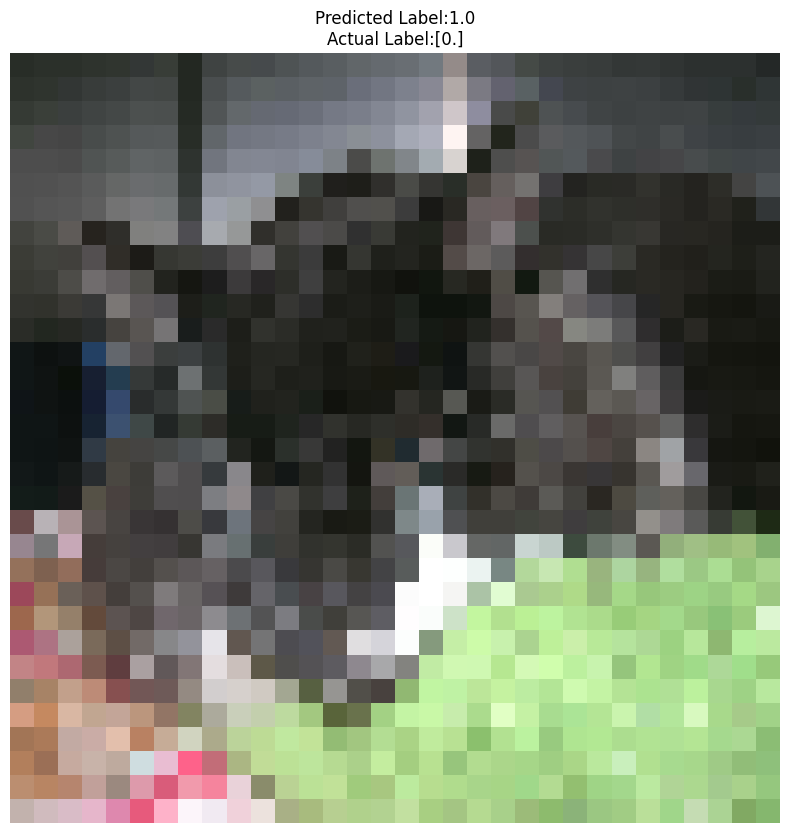

In [11]:
import matplotlib.pyplot as plt

#Function to plot a image
def plot_image(image,true_label,predict_label):
    plt.figure(figsize=(10,10))
    if image.ndim==1:
        image=image.reshape(32,32,3)
    plt.imshow(image,cmap=plt.cm.binary)
    plt.title(f"Predicted Label:{predict_label}\nActual Label:{true_label}")
    plt.axis('off')
    plt.show()
    

image=train_img[0]
train_true_lab=train_lab[0]
train_pred_lab=train_pred[0]

plot_image(image,train_true_lab,train_pred_lab)

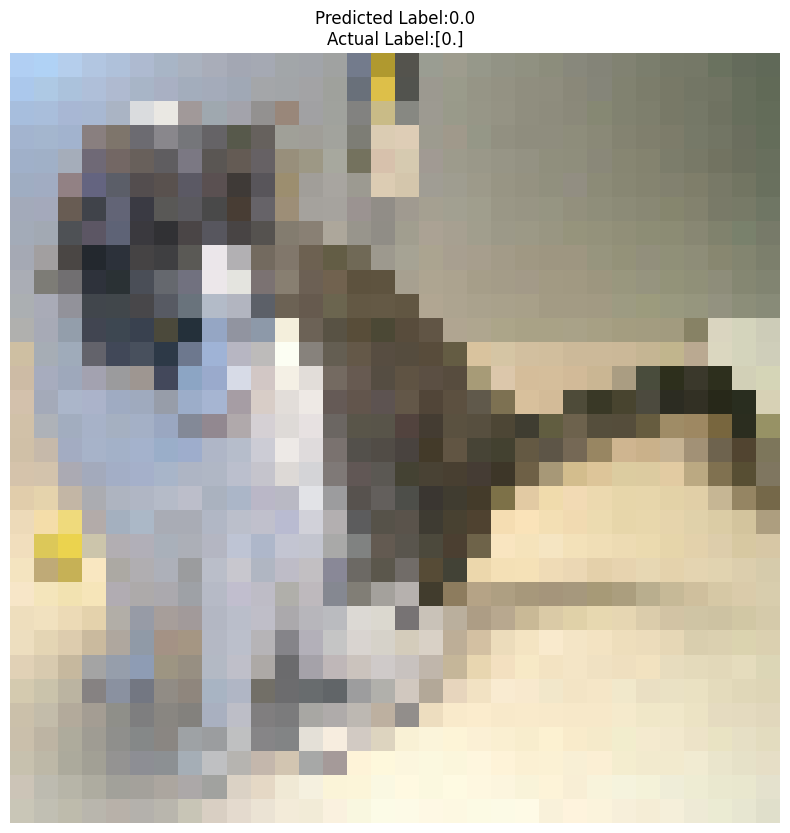

In [12]:
#For VALIDATION data
image=valid_img[110]
valid_true_lab=valid_lab[110]
valid_pred_lab=valid_pred[110]

plot_image(image,valid_true_lab,valid_pred_lab)

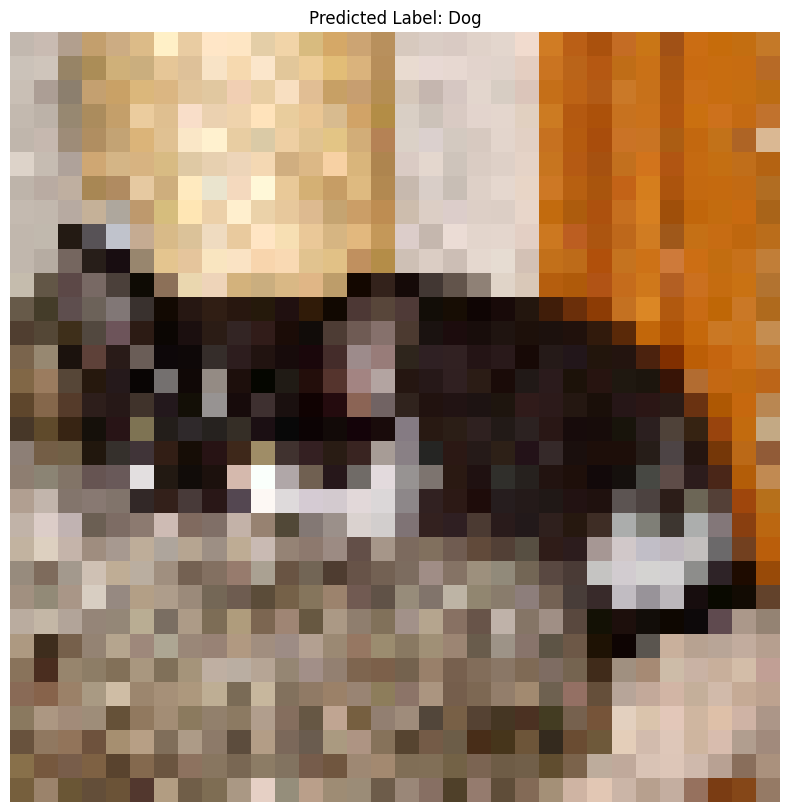

In [13]:
from tensorflow.keras.preprocessing import image
import os

# Path to the test directory
test_dir = '/kaggle/input/dogs-cats-small-dataset/test1'

# List files in the test directory
test_files = os.listdir(test_dir)

# Choose one image file from the test directory
test_image_path = os.path.join(test_dir, test_files[10])  # Using the first image in the directory

# Load and preprocess the test image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image
    return img_array

# Predict the label of the test image
def predict_image_label(model, img_array):
    img_array_flat=img_array.flatten().reshape(1,-1)
    prediction = model.predict(img_array_flat)
    predicted_label = 'Cat' if prediction < 0.5 else 'Dog'
    return predicted_label

# Plot the image and display the prediction
def plot_image_with_prediction(img_path, predicted_label):
    img = image.load_img(img_path, target_size=(32, 32))
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.title(f'Predicted Label: {predicted_label}')
    plt.axis('off')
    plt.show()

# Load and preprocess the image
test_img_array = load_and_preprocess_image(test_image_path)

# Predict the label
predicted_label = predict_image_label(svc, test_img_array)

# Plot the image with the predicted label
plot_image_with_prediction(test_image_path, predicted_label)


In [14]:
!ls /kaggle/input/dogs-cats-small-dataset/test1

1.jpg	  1133.jpg  189.jpg  323.jpg  459.jpg  594.jpg	729.jpg  864.jpg
10.jpg	  1134.jpg  19.jpg   324.jpg  46.jpg   595.jpg	73.jpg	 865.jpg
100.jpg   1135.jpg  190.jpg  325.jpg  460.jpg  596.jpg	730.jpg  866.jpg
1000.jpg  1136.jpg  191.jpg  326.jpg  461.jpg  597.jpg	731.jpg  867.jpg
1001.jpg  1137.jpg  192.jpg  327.jpg  462.jpg  598.jpg	732.jpg  868.jpg
1002.jpg  1138.jpg  193.jpg  328.jpg  463.jpg  599.jpg	733.jpg  869.jpg
1003.jpg  1139.jpg  194.jpg  329.jpg  464.jpg  6.jpg	734.jpg  87.jpg
1004.jpg  114.jpg   195.jpg  33.jpg   465.jpg  60.jpg	735.jpg  870.jpg
1005.jpg  1140.jpg  196.jpg  330.jpg  466.jpg  600.jpg	736.jpg  871.jpg
1006.jpg  1141.jpg  197.jpg  331.jpg  467.jpg  601.jpg	737.jpg  872.jpg
1007.jpg  1142.jpg  198.jpg  332.jpg  468.jpg  602.jpg	738.jpg  873.jpg
1008.jpg  1143.jpg  199.jpg  333.jpg  469.jpg  603.jpg	739.jpg  874.jpg
1009.jpg  1144.jpg  2.jpg    334.jpg  47.jpg   604.jpg	74.jpg	 875.jpg
101.jpg   1145.jpg  20.jpg   335.jpg  470.jpg  605.jpg	740.jpg  876.jpg
1